In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots that are created

# Read data
df = pd.read_csv(r'C:\Users\fabip\Desktop\data analysis project\movies.csv')


In [2]:
# Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [4]:
# delete rows with missing data, which missing percentage is low = 
#rating, released, score, votes, writer, start, country, gross, company, runtime

df = df.dropna(subset =['name', 'rating', 'genre','year', 'released', 'score',
                                     'votes', 'director', 'writer','star','country','gross',
                                     'company','runtime'])

In [5]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0


In [7]:
#extract year from rerleased and put it as yearcorrect
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0,2020


In [9]:
#sort movies by gross revenue
df.sort_values(by =['gross'], inplace = False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,NaN,1.672000e+03,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,NaN,1.605000e+03,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,NaN,1.400000e+03,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,6.820000e+02,Roxwell Films,93.0,2020


In [10]:
#Check for duplicates
sum(df.duplicated())

0

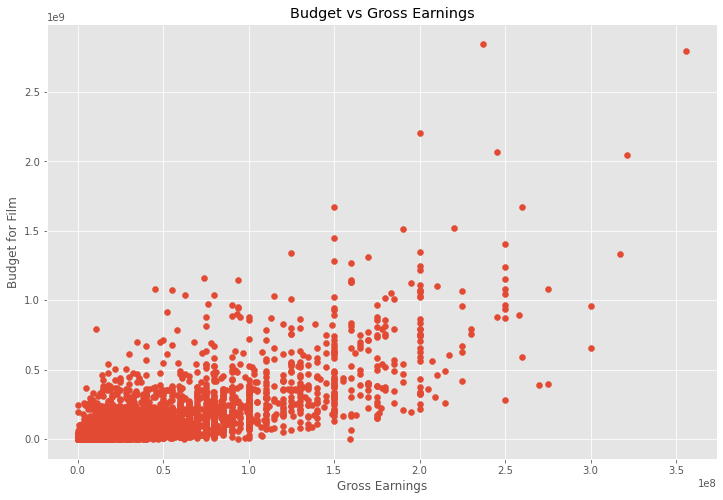

In [11]:
# Scatter plot with budget vs gross revenue

plt.scatter(x =df['budget'], y =df['gross'] )
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


<AxesSubplot:xlabel='budget', ylabel='gross'>

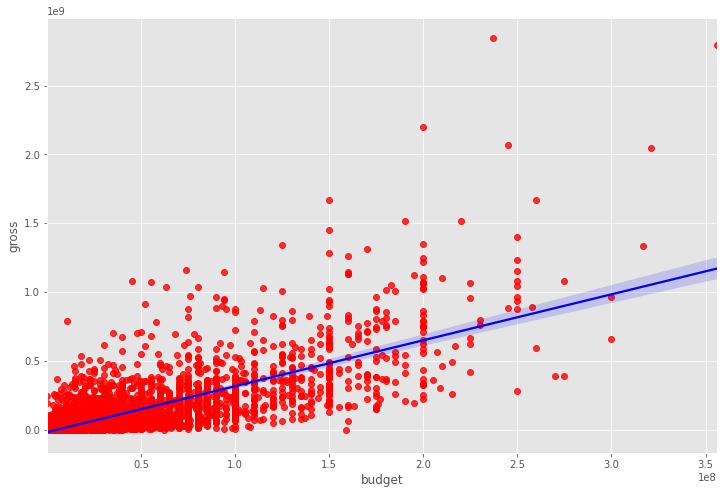

In [13]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', 
            data=df, scatter_kws= {'color':'red'}, line_kws={'color':'blue'})

In [14]:
# Let's look at correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.327722,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.072001,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.439675,0.631110,0.309945
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.258826,0.188071,0.631110,0.740247,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.318695,0.245117,1.000000


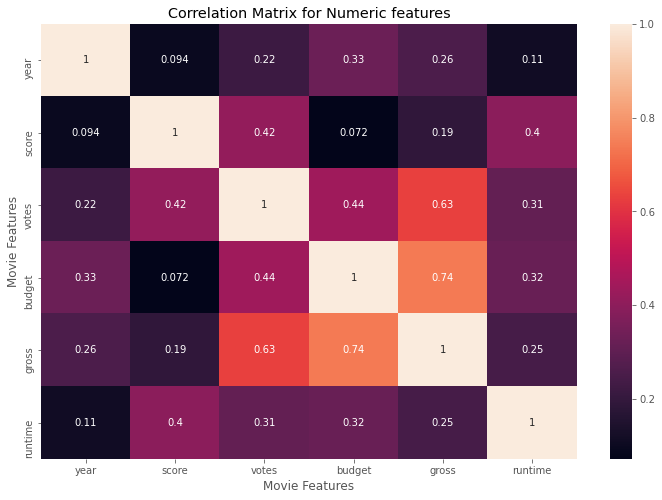

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
# look at company
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6372,6,6,1980,1654,8.4,927000.0,2471,3851,979,52,19000000.0,46998772.0,2179,146.0,0
1,5373,6,1,1980,1445,5.8,65000.0,2169,1564,306,53,4500000.0,58853106.0,686,104.0,0
2,4956,4,0,1980,1718,8.7,1200000.0,1063,2464,1642,53,18000000.0,538375067.0,1446,124.0,0
3,277,4,4,1980,1445,7.7,221000.0,1248,1920,2112,53,3500000.0,83453539.0,1697,88.0,0
4,993,6,4,1980,1494,7.3,108000.0,1010,499,387,53,6000000.0,39846344.0,1665,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,2020,978,6.8,42000.0,438,2838,895,6,135000000.0,111105497.0,17,100.0,40
7652,5586,3,0,2020,482,6.8,3700.0,1048,1602,2645,8,80000000.0,461421559.0,350,149.0,40
7653,6265,6,5,2020,89,5.4,2400.0,2404,3726,2300,53,NaN,3661.0,1786,98.0,40
7656,6792,5,4,2020,1831,5.0,294.0,2399,3719,2241,53,NaN,413378.0,1788,120.0,40


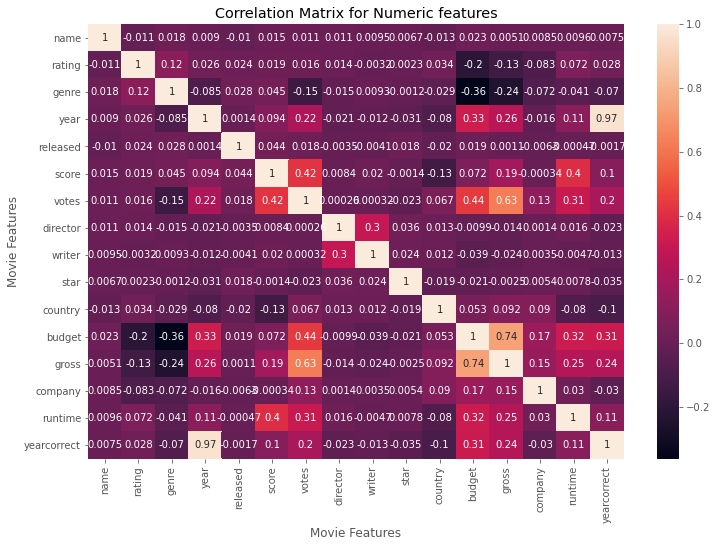

In [17]:
#Do companies correlate to a succesful movie?
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [25]:
correlation_mat = df_numerized.corr()

correlation_mat


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.010815,0.018363,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.023336,0.005135,0.008529,0.009563,0.007476
rating,-0.010815,1.000000,0.118600,0.025950,0.024188,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.203846,-0.131786,-0.083083,0.072340,0.027575
genre,0.018363,0.118600,1.000000,-0.084892,0.027639,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.362862,-0.242597,-0.071590,-0.040939,-0.070080
year,0.008987,0.025950,-0.084892,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.327722,0.258826,-0.015880,0.114237,0.967454
released,-0.010012,0.024188,0.027639,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.018546,0.001084,-0.006299,-0.000472,-0.001746
score,0.014970,0.018596,0.045478,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.072001,0.188071,-0.000342,0.397226,0.103727
votes,0.011462,0.016485,-0.148120,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.439675,0.631110,0.128127,0.309945,0.203172
director,0.010575,0.013653,-0.015227,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.009904,-0.014296,0.001379,0.015713,-0.022553
writer,0.009451,-0.003234,0.009340,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.039222,-0.024021,0.003462,-0.004668,-0.013378
star,0.006731,0.002255,-0.001158,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.020642,-0.002451,0.005417,0.007827,-0.034534


In [27]:
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.010815
             genre          0.018363
             year           0.008987
             released      -0.010012
                              ...   
yearcorrect  budget         0.314634
             gross          0.240752
             company       -0.029972
             runtime        0.110433
             yearcorrect    1.000000
Length: 256, dtype: float64

In [29]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.362862
budget       genre         -0.362862
gross        genre         -0.242597
genre        gross         -0.242597
rating       budget        -0.203846
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs> 0.5)]
high_corr

gross        votes          0.631110
votes        gross          0.631110
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.967454
yearcorrect  year           0.967454
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings